In [1]:
import numpy as np
import pandas as pd

import pygmo as pg

from uda import ES, EP
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook

import math
from matplotlib.colors import LogNorm

In [2]:
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
%load_ext line_profiler

## Parameter Search

In [4]:
population_sizes = [8, 13, 21, 34]
etas_a = [3.3e-03, 2e-02, 3.3e-02, 1e-01]
funcs = [1, 2, 6, 7, 9, 14]
dimensions = [10, 30]
N_RUNS = 51

In [18]:
results = []

for pop_size in population_sizes:
    for eta_a in etas_a:
        for nx in dimensions:
            for func in funcs:
                generations = nx * 10000 // pop_size - 1

                prob = pg.problem(pg.cec2014(prob_id=func, dim=nx))
                algo = pg.algorithm(pg.xnes(gen=generations, eta_sigma=eta_a, eta_b=eta_a,
                                            ftol=1e-9, xtol=1e-9, memory=True))
                algo.set_verbosity(1)
                archi = pg.archipelago(N_RUNS, algo=algo, prob=prob, pop_size=pop_size)
                archi.evolve(1)
                archi.wait()

                champions = [isl.get_population().champion_f[0] for isl in archi]
                evals = [isl.get_population().problem.get_fevals() for isl in archi]
                for run, properties in enumerate(zip(champions, evals)):
                    result = {
                                 "algo": "xNES",
                                 "function": func,
                                 "dimensions": nx,
                                 "run": run,
                                 "champion_f": properties[0],
                                 "evals": properties[1],
                                 "eta_a": eta_a,
                                 "pop_size": pop_size
                             }

                    results.append(result)


results = pd.DataFrame(results, columns=["function", "dimensions", "algo", "run",
                                         "champion_f", "evals", "eta_a", "pop_size"])
results["error"] = results["champion_f"] - (results["function"] * 100)
results["success"] = results["error"] < 1e-8

In [5]:
results = pd.read_pickle("hiper_51runs.p")

In [6]:
results.groupby(["algo", "function", "dimensions", "eta_a", "pop_size"]).mean()

run    champion_f          evals  \
algo function dimensions eta_a  pop_size                                      
xNES 1        10         0.0033 8         25.0  3.358052e+02  100000.000000   
                                13        25.0  7.988419e+03   99996.000000   
                                21        25.0  1.275839e+05   99981.000000   
                                34        25.0  1.430295e+06   99994.000000   
                         0.0200 8         25.0  1.000000e+02   51912.627451   
                                13        25.0  1.000000e+02   71129.372549   
                                21        25.0  1.000000e+02   99981.000000   
                                34        25.0  1.000004e+02   99994.000000   
                         0.0330 8         25.0  1.000000e+02   31949.647059   
                                13        25.0  1.000000e+02   44081.215686   
                                21        25.0  1.000000e+02   63613.117647   
                                34        25.0  1.000000e+02   96288.000000   
                         0.1000 8         25.0  1.000000e+02   11598.274510   
                                13        25.0  1.000000e+02   15064.705882   
                                21        25.0  1.000000e+02   21630.000000   
                                34        25.0  1.000000e+02   32164.000000   
              30         0.0033 8         25.0  1.021321e+02  300000.000000   
                                13        25.0  2.451374e+02  299988.000000   
                                21        25.0  1.036384e+04  299985.000000   
                                34        25.0  4.737675e+05  299982.000000   
                         0.0200 8         25.0  1.000000e+02  113194.196078   
                                13        25.0  1.000000e+02  139733.941176   
                                21        25.0  1.000000e+02  188479.117647   
                                34        25.0  1.000000e+02  274744.666667   
                         0.0330 8         25.0  1.320208e+04  170405.019608   
                                13        25.0  1.000000e+02   89316.627451   
                                21        25.0  1.000000e+02  118371.647059   
                                34        25.0  1.000000e+02  169117.333333   
                         0.1000 8         25.0  1.873437e+08  300000.000000   
                                13        25.0  6.384391e+06  299988.000000   
...                                        ...           ...            ...   
     14       10         0.0033 21        25.0  1.400222e+03   99981.000000   
                                34        25.0  1.400302e+03   99994.000000   
                         0.0200 8         25.0  1.400342e+03   65487.529412   
                                13        25.0  1.400342e+03   85044.470588   
                                21        25.0  1.400301e+03   99981.000000   
                                34        25.0  1.400311e+03   99994.000000   
                         0.0330 8         25.0  1.400382e+03   40394.352941   
                                13        25.0  1.400378e+03   52482.529412   
                                21        25.0  1.400364e+03   74146.882353   
                                34        25.0  1.400338e+03   99994.000000   
                         0.1000 8         25.0  1.400428e+03   44452.549020   
                                13        25.0  1.400428e+03   18462.039216   
                                21        25.0  1.400420e+03   25384.058824   
                                34        25.0  1.400372e+03   37420.000000   
              30         0.0033 8         25.0  1.400300e+03  300000.000000   
                                13        25.0  1.400411e+03  299988.000000   
                                21        25.0  1.400297e+03  299985.000000   
                                34        25.0  1.400293e+03  299982.000000   
              

In [8]:
results.groupby(["algo", "function", "dimensions", "eta_a", "pop_size"]).median()

run    champion_f     evals  \
algo function dimensions eta_a  pop_size                                
xNES 1        10         0.0033 8         3.5  2.962459e+02  100000.0   
                                13        3.5  8.621346e+03   99996.0   
                                21        3.5  1.762432e+05   99981.0   
                                34        3.5  1.523000e+06   99994.0   
                         0.0200 8         3.5  1.000000e+02   52312.0   
                                13        3.5  1.000000e+02   71903.0   
                                21        3.5  1.000000e+02   99981.0   
                                34        3.5  1.000003e+02   99994.0   
                         0.0330 8         3.5  1.000000e+02   32324.0   
                                13        3.5  1.000000e+02   44109.0   
                                21        3.5  1.000000e+02   63882.0   
                                34        3.5  1.000000e+02   96322.0   
                         0.1000 8         3.5  1.000000e+02   11788.0   
                                13        3.5  1.000000e+02   15353.0   
                                21        3.5  1.000000e+02   21630.0   
                                34        3.5  1.000000e+02   32232.0   
              30         0.0033 8         3.5  1.019787e+02  300000.0   
                                13        3.5  2.507369e+02  299988.0   
                                21        3.5  1.243067e+04  299985.0   
                                34        3.5  4.018154e+05  299982.0   
                         0.0200 8         3.5  1.000000e+02  114884.0   
                                13        3.5  1.000000e+02  140491.0   
                                21        3.5  1.000000e+02  190554.0   
                                34        3.5  1.000000e+02  273819.0   
                         0.0330 8         3.5  3.039554e+02  190540.0   
                                13        3.5  1.000000e+02   88744.5   
                                21        3.5  1.000000e+02  118009.5   
                                34        3.5  1.000000e+02  169014.0   
                         0.1000 8         3.5  2.118513e+08  300000.0   
                                13        3.5  7.278334e+06  299988.0   
...                                       ...           ...       ...   
     14       10         0.0033 21        3.5  1.400229e+03   99981.0   
                                34        3.5  1.400296e+03   99994.0   
                         0.0200 8         3.5  1.400406e+03   65864.0   
                                13        3.5  1.400374e+03   84565.0   
                                21        3.5  1.400376e+03   99981.0   
                                34        3.5  1.400287e+03   99994.0   
                         0.0330 8         3.5  1.400369e+03   40036.0   
                                13        3.5  1.400386e+03   53027.0   
                                21        3.5  1.400370e+03   72943.5   
                                34        3.5  1.400330e+03   99994.0   
                         0.1000 8         3.5  1.400433e+03   47256.0   
                                13        3.5  1.400382e+03   18765.5   
                                21        3.5  1.400441e+03   25756.5   
                                34        3.5  1.400383e+03   37638.0   
              30         0.0033 8         3.5  1.400274e+03  300000.0   
                                13        3.5  1.400291e+03  299988.0   
                                21        3.5  1.400294e+03  299985.0   
                                34        3.5  1.400291e+03  299982.0   
                         0.0200 8         3.5  1.400345e+03  300000.0   
                                13        3.5  1.400335e+03  299988.0   
                                21        3.5  1.400500e+03  299985.0   
                                34        3.5  1.400381e+03  299982.0   
                         0.

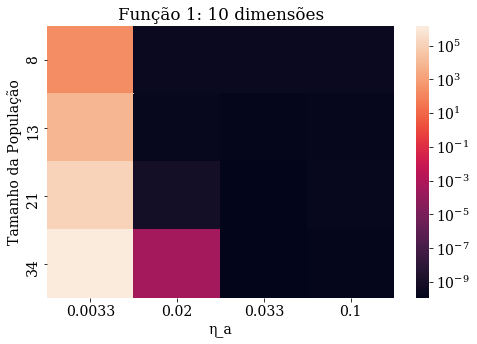

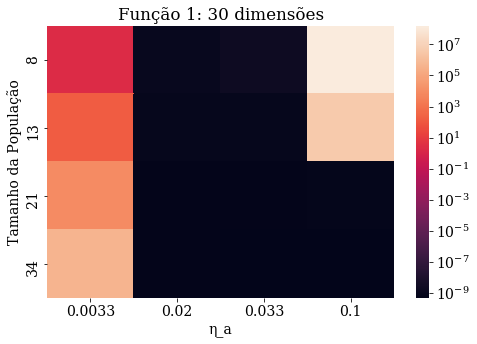

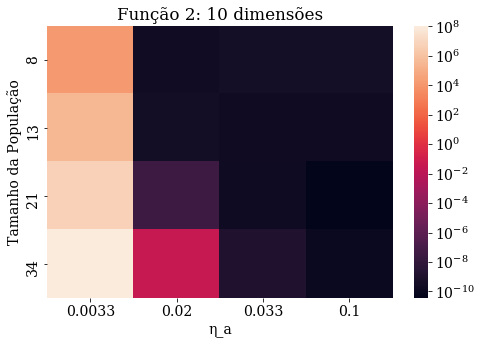

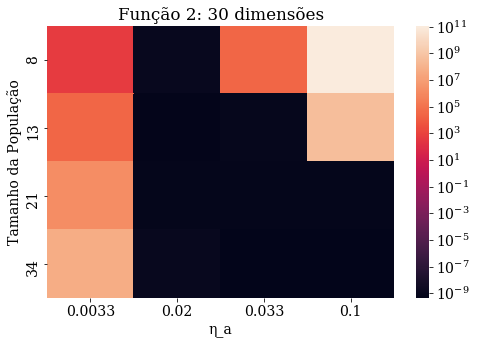

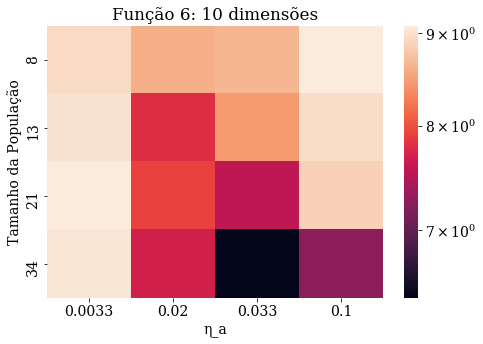

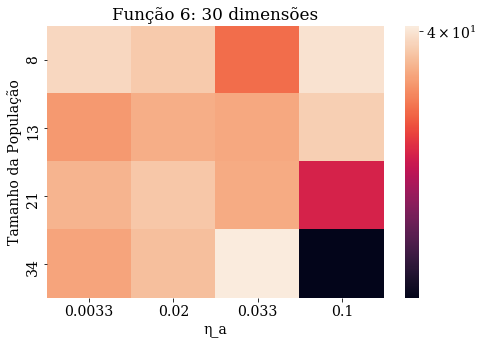

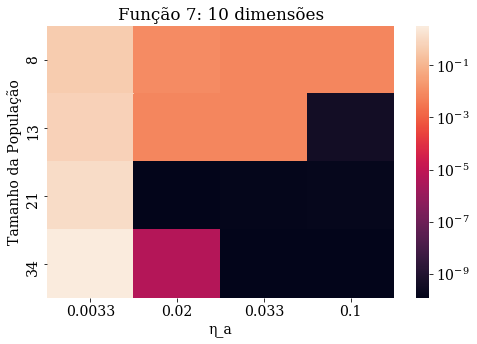

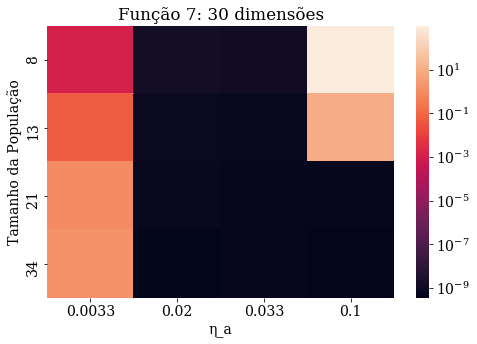

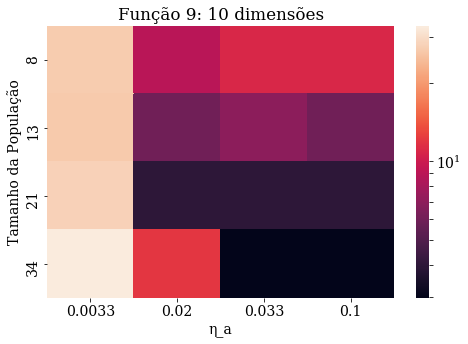

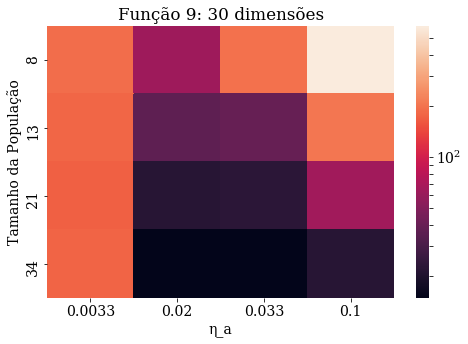

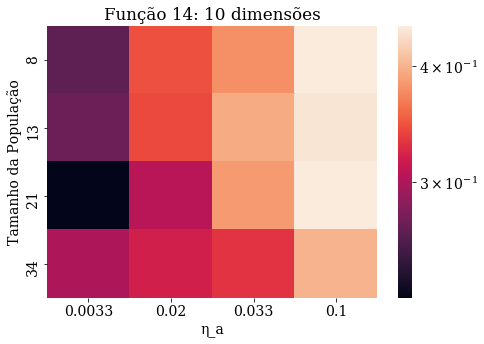

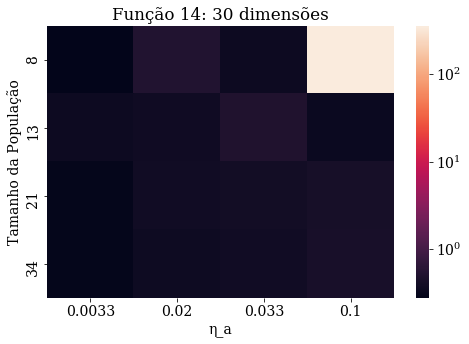

In [16]:
for func in funcs:
    for dim in dimensions:
        error_median = results.loc[(results.function == func) & (results.dimensions == dim), :]\
                              .groupby(["eta_a", "pop_size"]).median()["error"]
        error_median = pd.DataFrame(error_median.to_frame().to_records()).pivot("pop_size", "eta_a", "error")

        vmin, vmax = error_median.min().min(), error_median.max().max()
        log_norm = LogNorm(vmin=vmin, vmax=vmax)
        cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(vmin)),
                                                     1+math.ceil(math.log10(vmax)))]
        if len(cbar_ticks) > 5:
            cbar_ticks = [v for k, v in enumerate(cbar_ticks) if k % 2]
        if len(cbar_ticks) < 4:
            cbar_ticks = None
            
        if vmax < 3 * vmin:
            pass
            
        plt.figure(figsize=(7,5))
        plt.title(f"Função {func}: {dim} dimensões")
        ax = sns.heatmap(error_median, norm=log_norm, cbar_kws={"ticks": cbar_ticks})
        ax.set(xlabel='η_a', ylabel='Tamanho da População')
        plt.tight_layout()
        plt.savefig(f"hiperparams/function={func:02d}_dim={dim:02d}")

In [17]:
results.groupby(["eta_a", "pop_size"]).std()["success"]

eta_a   pop_size
0.0033  8           0.000000
        13          0.000000
        21          0.000000
        34          0.000000
0.0200  8           0.496328
        13          0.498310
        21          0.483005
        34          0.433367
0.0330  8           0.473496
        13          0.497998
        21          0.499229
        34          0.500024
0.1000  8           0.399836
        13          0.408199
        21          0.488989
        34          0.500398
Name: success, dtype: float64

### Results Analysis

In [5]:
funcs = [1, 2, 6, 7, 9, 14]
dimensions = [10, 30]
N_RUNS = 51

In [6]:
results = []

for nx in dimensions:
    for func in funcs:
        pop_size = 21
        eta_a = 3.3e-02
        generations = nx * 10000 // pop_size - 1

        prob = pg.problem(pg.cec2014(prob_id=func, dim=nx))
        algo = pg.algorithm(pg.xnes(gen=generations, eta_sigma=eta_a, eta_b=eta_a,
                                    ftol=1e-9, xtol=1e-9, memory=True))
        archi = pg.archipelago(N_RUNS, algo=algo, prob=prob, pop_size=pop_size)
        archi.evolve(1)
        archi.wait()

        champions = [isl.get_population().champion_f[0] for isl in archi]
        evals = [isl.get_population().problem.get_fevals() for isl in archi]
        for run, properties in enumerate(zip(champions, evals)):
            result = {
                         "algo": "xNES Selecionado",
                         "function": func,
                         "dimensions": nx,
                         "run": run,
                         "champion_f": properties[0],
                         "evals": properties[1],
                         "eta_a": eta_a,
                         "pop_size": pop_size
                     }

            results.append(result)

for nx in dimensions:
    for func in funcs:
        pop_size = int(np.around(4 + 3 * np.log(nx)))
        generations = nx * 10000 // pop_size - 1

        prob = pg.problem(pg.cec2014(prob_id=func, dim=nx))
        algo = pg.algorithm(pg.xnes(gen=generations, ftol=1e-9, xtol=1e-9, memory=True))
        archi = pg.archipelago(N_RUNS, algo=algo, prob=prob, pop_size=pop_size)
        archi.evolve(1)
        archi.wait()

        champions = [isl.get_population().champion_f[0] for isl in archi]
        evals = [isl.get_population().problem.get_fevals() for isl in archi]
        for run, properties in enumerate(zip(champions, evals)):
            result = {
                         "algo": "xNES",
                         "function": func,
                         "dimensions": nx,
                         "run": run,
                         "champion_f": properties[0],
                         "evals": properties[1],
                         "eta_a": eta_a,
                         "pop_size": pop_size
                     }

            results.append(result)

for nx in dimensions:
    for func in funcs:
        pop_size = int(np.around(4 + 3 * np.log(nx)))
        generations = nx * 10000 // pop_size - 1
        
        prob = pg.problem(pg.cec2014(prob_id=func, dim=nx))
        algo = pg.algorithm(pg.cmaes(gen=generations, ftol=1e-9, xtol=1e-9, memory=True))
        archi = pg.archipelago(N_RUNS, algo=algo, prob=prob, pop_size=pop_size)
        archi.evolve(1)
        archi.wait()
        
        champions = [isl.get_population().champion_f[0] for isl in archi]
        evals = [isl.get_population().problem.get_fevals() for isl in archi]
        for run, properties in enumerate(zip(champions, evals)):
            result = {
                         "algo": "CMA-ES",
                         "function": func,
                         "dimensions": nx,
                         "run": run,
                         "champion_f": properties[0],
                         "evals": properties[1]
                     }
            
            results.append(result)


results = pd.DataFrame(results, columns=["function", "dimensions", "algo", "run",
                                         "champion_f", "evals", "eta_a", "pop_size"])
results["error"] = results["champion_f"] - (results["function"] * 100)
results["success"] = results["error"] < 1e-8

In [81]:
results.groupby(["function", "dimensions", "algo"]).min()["error"]

function  dimensions  algo            
1         10          CMA-ES              1.12e-10
                      xNES Original       1.42e-10
                      xNES Selecionado    1.27e-10
          30          CMA-ES              5.60e-10
                      xNES Original       5.23e-10
                      xNES Selecionado    5.09e-10
2         10          CMA-ES              9.73e-11
                      xNES Original       1.16e-10
                      xNES Selecionado    1.23e-10
          30          CMA-ES              5.00e-10
                      xNES Original       5.22e-10
                      xNES Selecionado    4.21e-10
6         10          CMA-ES              7.88e-09
                      xNES Original       5.95e+00
                      xNES Selecionado    4.51e-02
          30          CMA-ES              1.47e-01
                      xNES Original       3.65e+01
                      xNES Selecionado    3.75e+01
7         10          CMA-ES              9

In [54]:
pd.set_option('precision', 2)

In [86]:
for algo in [results.algo.unique()[-1]]:
    for dim in dimensions:
        print(f"\n{algo}: {dim}")
        gb = results.loc[((results.algo == algo) & (results.dimensions == dim))].groupby(["function"])
        tmp = gb.mean()["error"].rename("média").to_frame()
        tmp["mediana"] = gb.median()["error"]
        tmp["melhor"] = gb.min()["error"]
        tmp["pior"] = gb.max()["error"]
        tmp["desvio padrão"] = gb.std()["error"]
        tmp["taxa de sucesso"] = gb.mean()["success"].astype(float)
        tmp = tmp[["melhor", "pior", "mediana", "média", "desvio padrão", "taxa de sucesso"]]
        print(tmp)
        print(tmp.to_latex())


CMA-ES: 10
            melhor      pior   mediana     média  desvio padrão  \
function                                                          
1         1.12e-10  1.04e-09  3.31e-10  3.57e-10       1.80e-10   
2         9.73e-11  8.84e-10  2.64e-10  2.88e-10       1.39e-10   
6         7.88e-09  9.13e+00  1.24e+00  2.06e+00       2.49e+00   
7         9.66e-11  4.18e-02  9.86e-03  1.16e-02       1.03e-02   
9         2.98e+00  2.19e+01  1.19e+01  1.16e+01       4.64e+00   
14        2.30e-01  5.00e-01  4.77e-01  4.44e-01       7.38e-02   

          taxa de sucesso  
function                   
1                    1.00  
2                    1.00  
6                    0.02  
7                    0.25  
9                    0.00  
14                   0.00  
\begin{tabular}{lrrrrrr}
\toprule
{} &    melhor &      pior &   mediana &     média &  desvio padrão &  taxa de sucesso \\
function &           &           &           &           &                &                  \\
\midrul

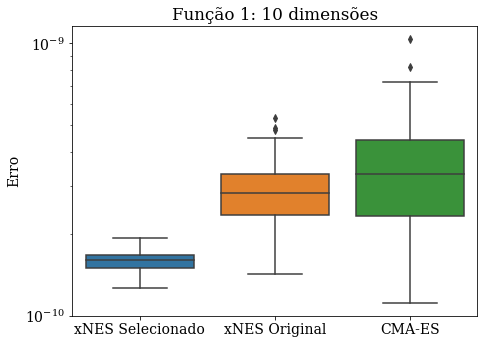

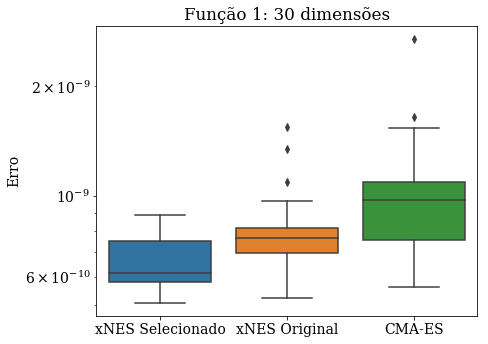

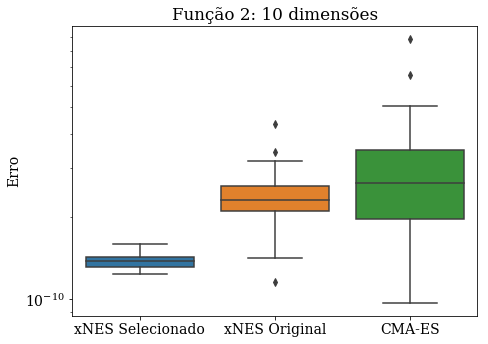

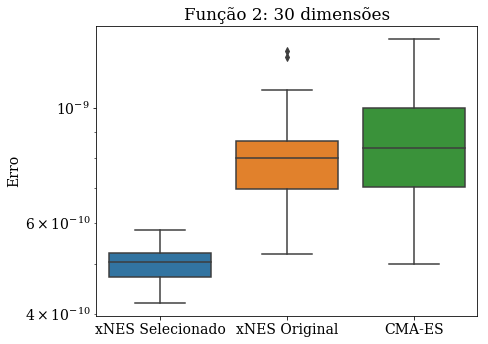

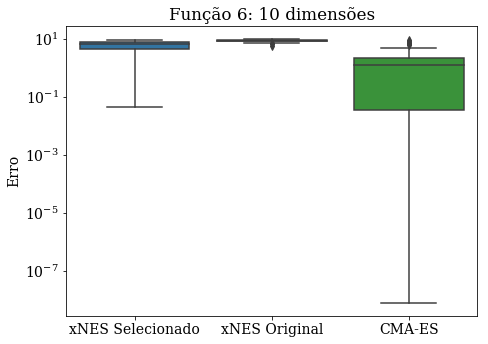

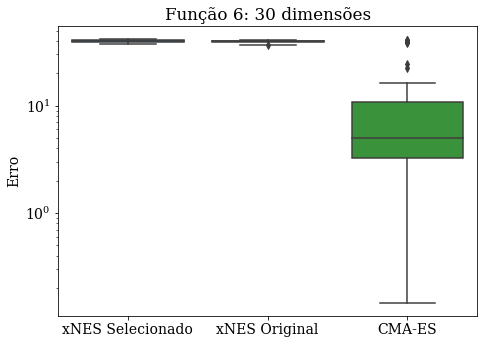

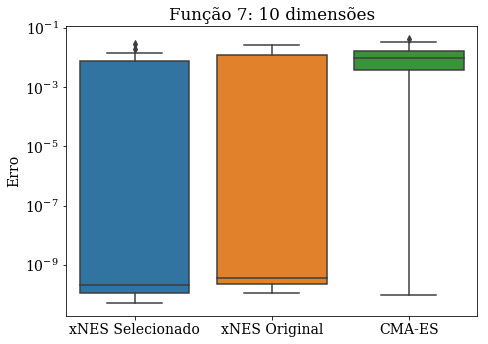

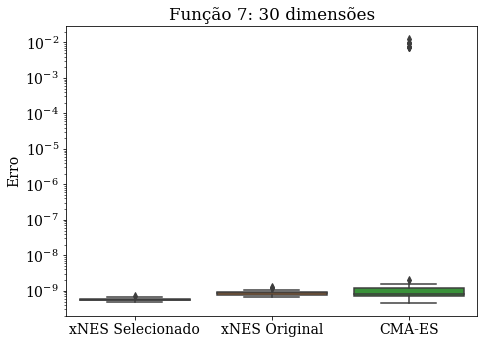

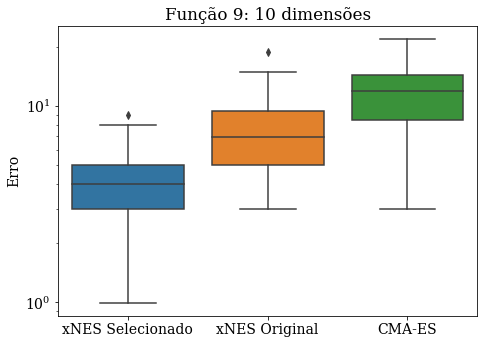

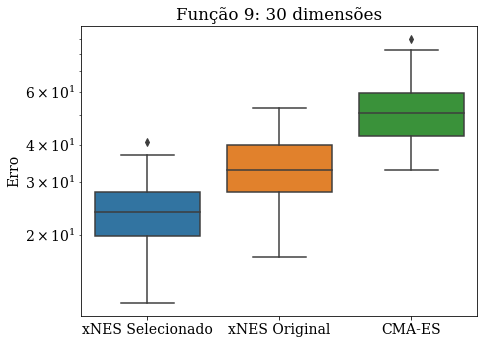

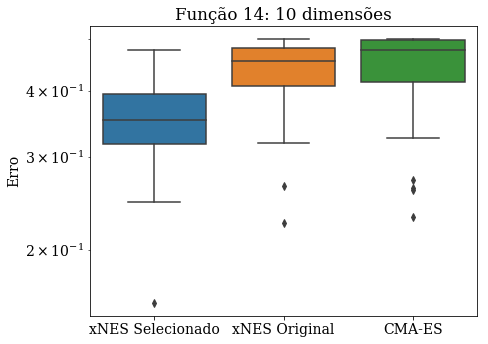

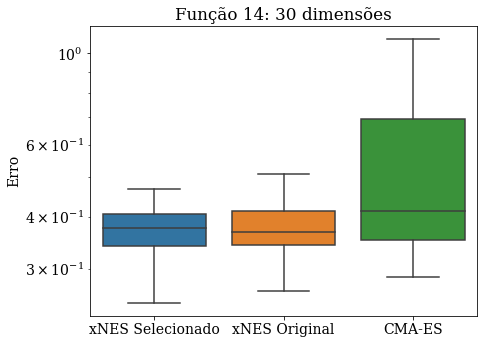

In [19]:
for func in funcs:
    for dim in dimensions:
        data = results.loc[((results.function == func) & (results.dimensions == dim)), :]

        plt.figure(figsize=(7,5))
        plt.title(f"Função {func}: {dim} dimensões")
        ax = sns.boxplot(data=data, x="algo", y="error")
        ax.set(xlabel='', ylabel='Erro')
        plt.yscale('log')
        plt.tight_layout()
        plt.savefig(f"results/function={func:02d}_dim={dim:02d}")

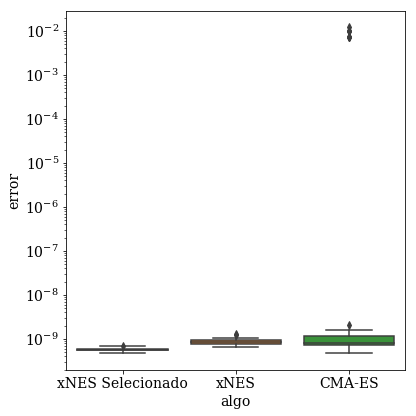

In [8]:
data = results.loc[((results.function == 7) & (results.dimensions == 30)), :]

plt.figure(figsize=(6,6))
ax = sns.boxplot(data=data, x="algo", y="error")
plt.yscale('log')
#plt.ylim((10**-14, 10**2))
plt.tight_layout()
plt.show()

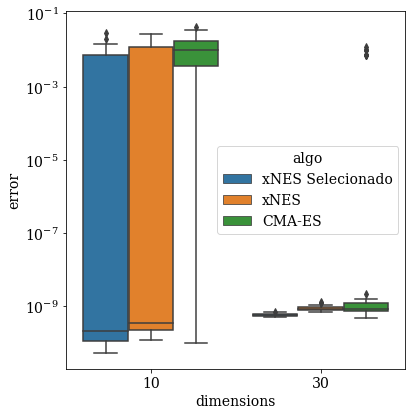

In [7]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=results.loc[results.function == 7, :], x="dimensions", y="error", hue="algo")
plt.yscale('log')
#plt.ylim((10**-14, 10**2))
plt.tight_layout()
plt.show()

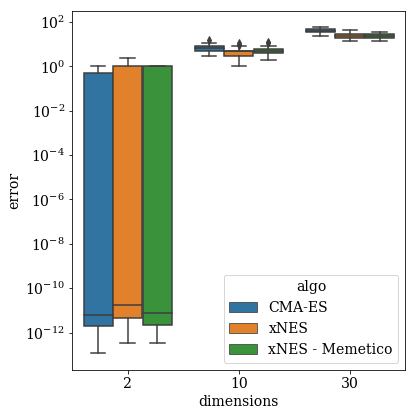

In [12]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=results.loc[results.function == 9, :], x="dimensions", y="error", hue="algo")
plt.yscale('log')
#plt.ylim((10**-14, 10**2))
plt.tight_layout()
plt.show()

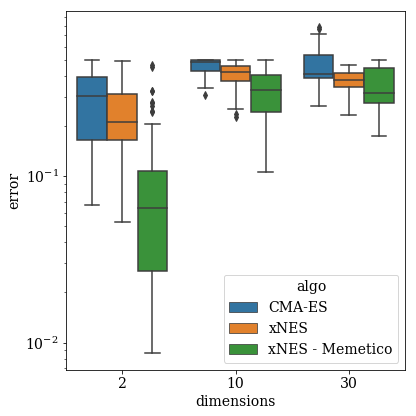

In [10]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=results.loc[results.function == 14, :], x="dimensions", y="error", hue="algo")
plt.yscale('log')
#plt.ylim((10**-14, 10**2))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


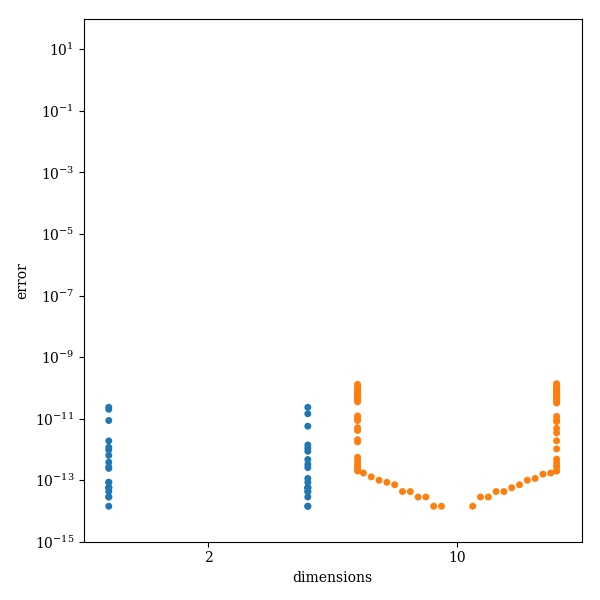

In [16]:
plt.figure(figsize=(6,6))
ax = sns.swarmplot(x=results.loc[results.function == 1, "dimensions"], y=results.loc[results.function == 1, "error"])
plt.yscale('log')
plt.ylim((10**-15, 10**2))
plt.tight_layout()
plt.show()

## Debug

### Algo

In [8]:
prob = pg.problem(pg.cec2014(prob_id=1, dim=2))
algo = ES(memory=True)
pop = pg.population(prob=prob, size=POP_SIZE)

In [9]:
%lprun -f algo.evolve algo.evolve(pop)

In [11]:
for _ in range(10):
    #print(pop.champion_f[0])
    print(pop.get_f()[:, 0].mean())
    algo.evolve(pop)

6787.639164846338
6517.004330737569
3911.1722927743176
3817.269752746578
12643.944862216365
7281.807480712583
5739.149739969055
8012.224507580415
3988.823754646437
5662.45915878652


### Island

In [12]:
prob = pg.problem(pg.cec2014(prob_id=1, dim=2))
algo = ES(memory=True)
isl = pg.island(algo=algo, prob=prob, size=POP_SIZE)

In [13]:
print(isl.get_population().champion_f[0])
isl.evolve(10)
isl.wait()
print(isl.get_population().champion_f[0])

96308580.35220265
2811.8345166483887
